In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")

170498071/170498071 [==============================] - 2s 0us/step
X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [3]:
K = len(set(y_train))
print(f"Number of classes: {K}")

Number of classes: 10


In [4]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 76s 39ms/step - loss: 1.9553 - accuracy: 0.3722 - val_loss: 1.4463 - val_accuracy: 0.4928
Epoch 2/50
1562/1562 [==============================] - 56s 36ms/step - loss: 1.4494 - accuracy: 0.4784 - val_loss: 1.4528 - val_accuracy: 0.5072
Epoch 3/50
1562/1562 [==============================] - 43s 28ms/step - loss: 1.3391 - accuracy: 0.5234 - val_loss: 1.6107 - val_accuracy: 0.4849
Epoch 4/50
1562/1562 [==============================] - 41s 26ms/step - loss: 1.2688 - accuracy: 0.5525 - val_loss: 1.1963 - val_accuracy: 0.6029
Epoch 5/50
1562/1562 [==============================] - 41s 26ms/step - loss: 1.2153 - accuracy: 0.5710 - val_loss: 1.2057 - val_accuracy: 0.5843
Epoch 6/50
1562/1562 [==============================] - 44s 28ms/step - loss: 1.1699 - accuracy: 0.5937 - val_loss: 1.0431 - val_accuracy: 0.6507
Epoch 7/50
1562/1562 [==============================] - 41s 26ms/step - loss: 1.1280 - accuracy: 0.6058 - val_loss: 1.7774 -

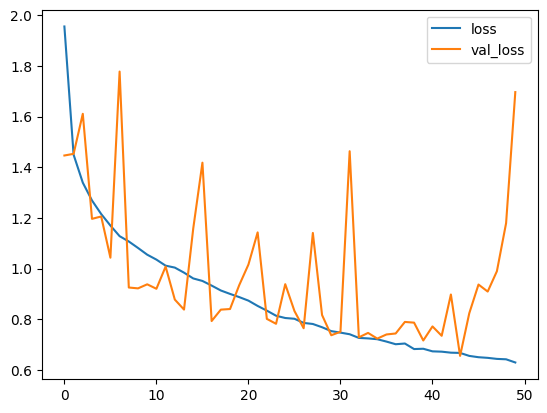

In [7]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

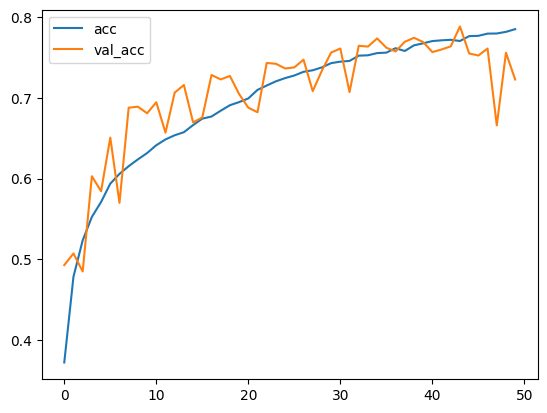

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[798  41  47  27   9   2  14   7  28  27]
 [ 11 931   5   4   0   0   9   3   6  31]
 [ 59  21 599  91  46  20 105  37   7  15]
 [ 17  34  51 617  23  62 134  38   9  15]
 [ 23  17  53  97 531   4 161  99   9   6]
 [ 19  20  63 298  33 440  66  52   5   4]
 [  9   8  24  53  14   2 885   2   1   2]
 [ 16  20  34  44  20  23  39 781   2  21]
 [ 61  52   8  15   5   1   7   1 813  37]
 [ 21 109   1  13   2   0   8   7   7 832]]


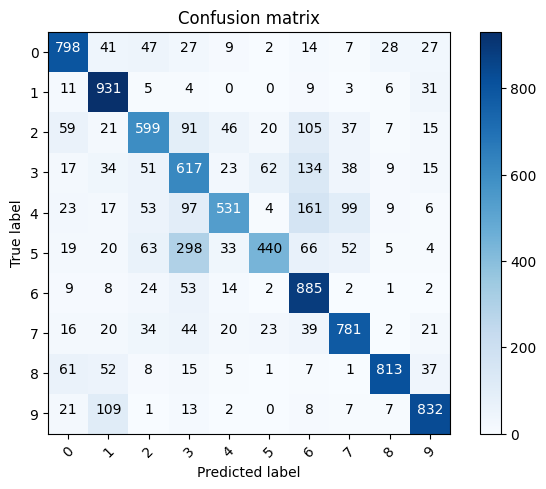

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

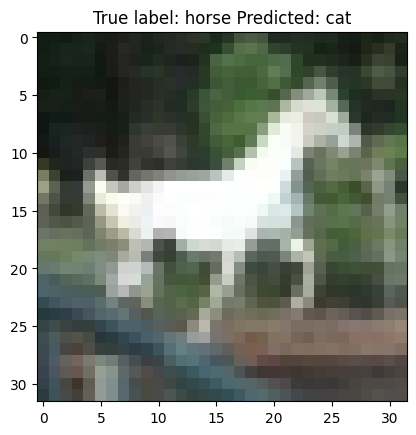

In [12]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0     